# Baseball Case Study

'''Problem Statement: This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)'''

In [1103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,roc_auc_score, mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB,GaussianNB 

In [1104]:
df=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv')

In [1105]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [1106]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [1107]:
df.sample()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
19,64,640,5571,1382,257,27,167,496,1255,134,754,700,4.33,2,8,35,90


In [1108]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [1109]:
#checking the data types
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [1110]:
df.shape

(30, 17)

In [1111]:
#checking the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [1112]:
df.drop_duplicates()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Exploratory Data Analysis
Graphical Representation

Text(0.5, 1.0, 'Winning Prediction')

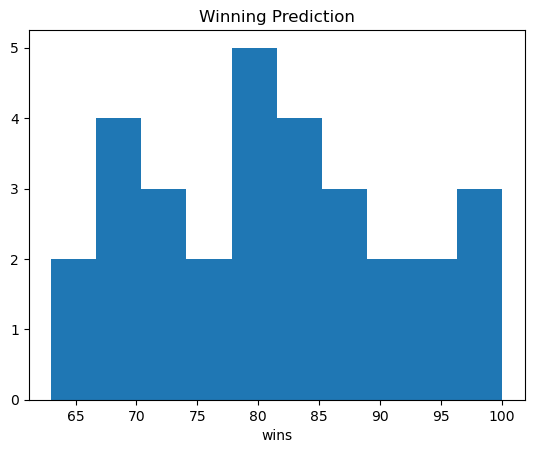

In [1113]:
# Histogram Display distribution of data across all level of category
plt.hist(df['W'])
plt.xlabel('wins')
plt.title('Winning Prediction')

<AxesSubplot: xlabel='W', ylabel='Density'>

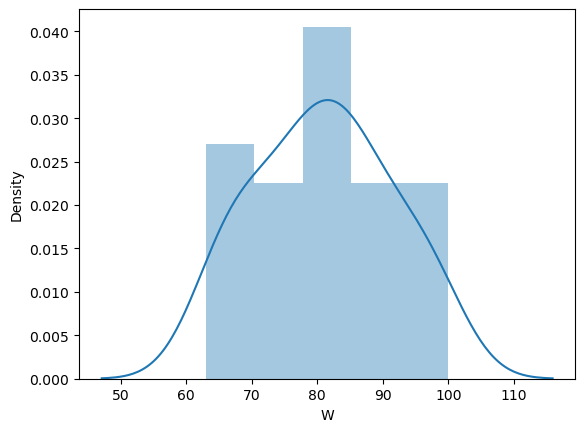

In [1114]:
# Distplot Display distribution of data across all level of category
sns.distplot(df['W'],kde=True)

Just by observing distplot, the winning distribution of base ball is lies between 65 to 95.

<AxesSubplot: xlabel='R', ylabel='Density'>

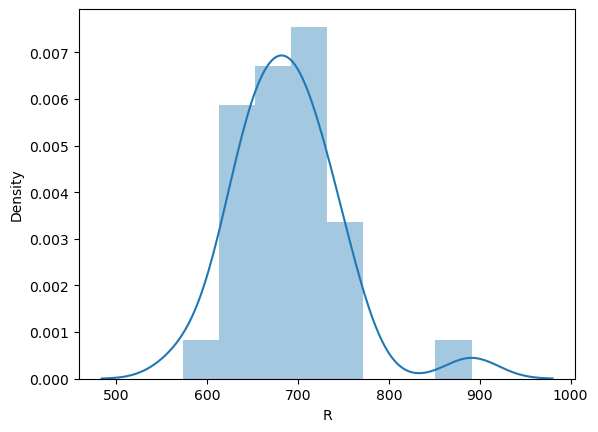

In [1115]:
# Distplot Display distribution of data across all level of category
sns.distplot(df['R'],kde=True)

By observing the distplot, the runs scored by an team lies between 600 to 890.

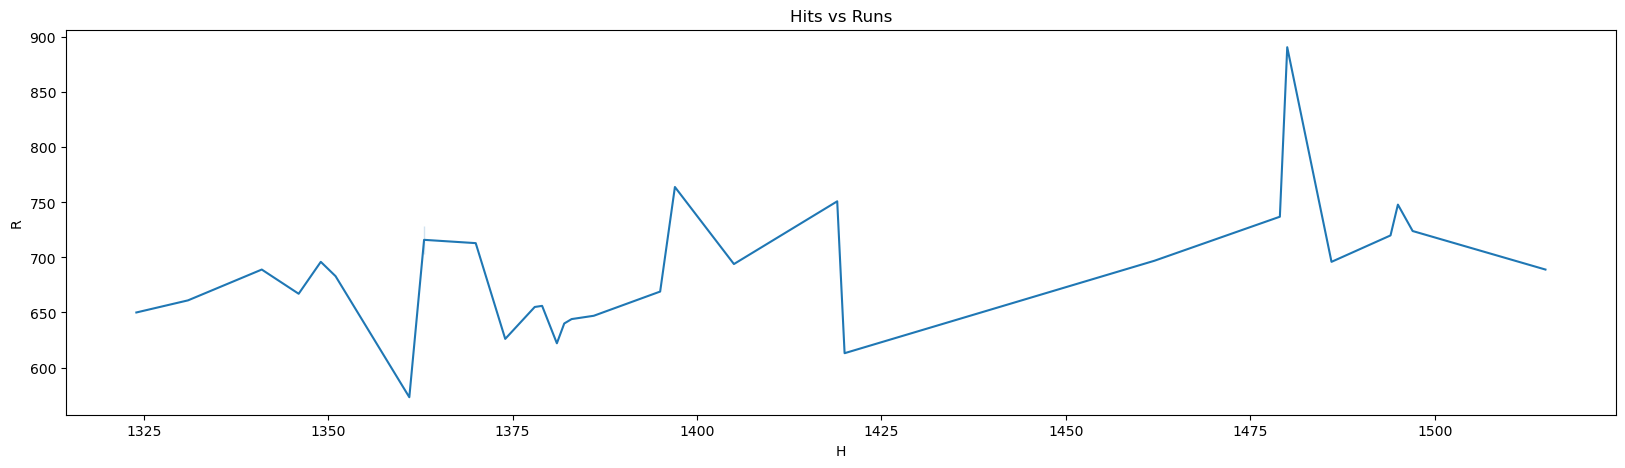

In [1116]:
# Lineplot Display distribution of data across Hits vs Runs.
plt.figure(figsize=(20,5))
plt.title('Hits vs Runs')
sns.lineplot(x='H',y='R',data=df)
plt.show()

By observing the lineplot, the runs scored by an teams by hits lies between 1300 to 1500. The highest runs scored by an team when they have more hits of 1480.

<AxesSubplot: title={'center': 'At bat vs Wins'}, xlabel='AB', ylabel='W'>

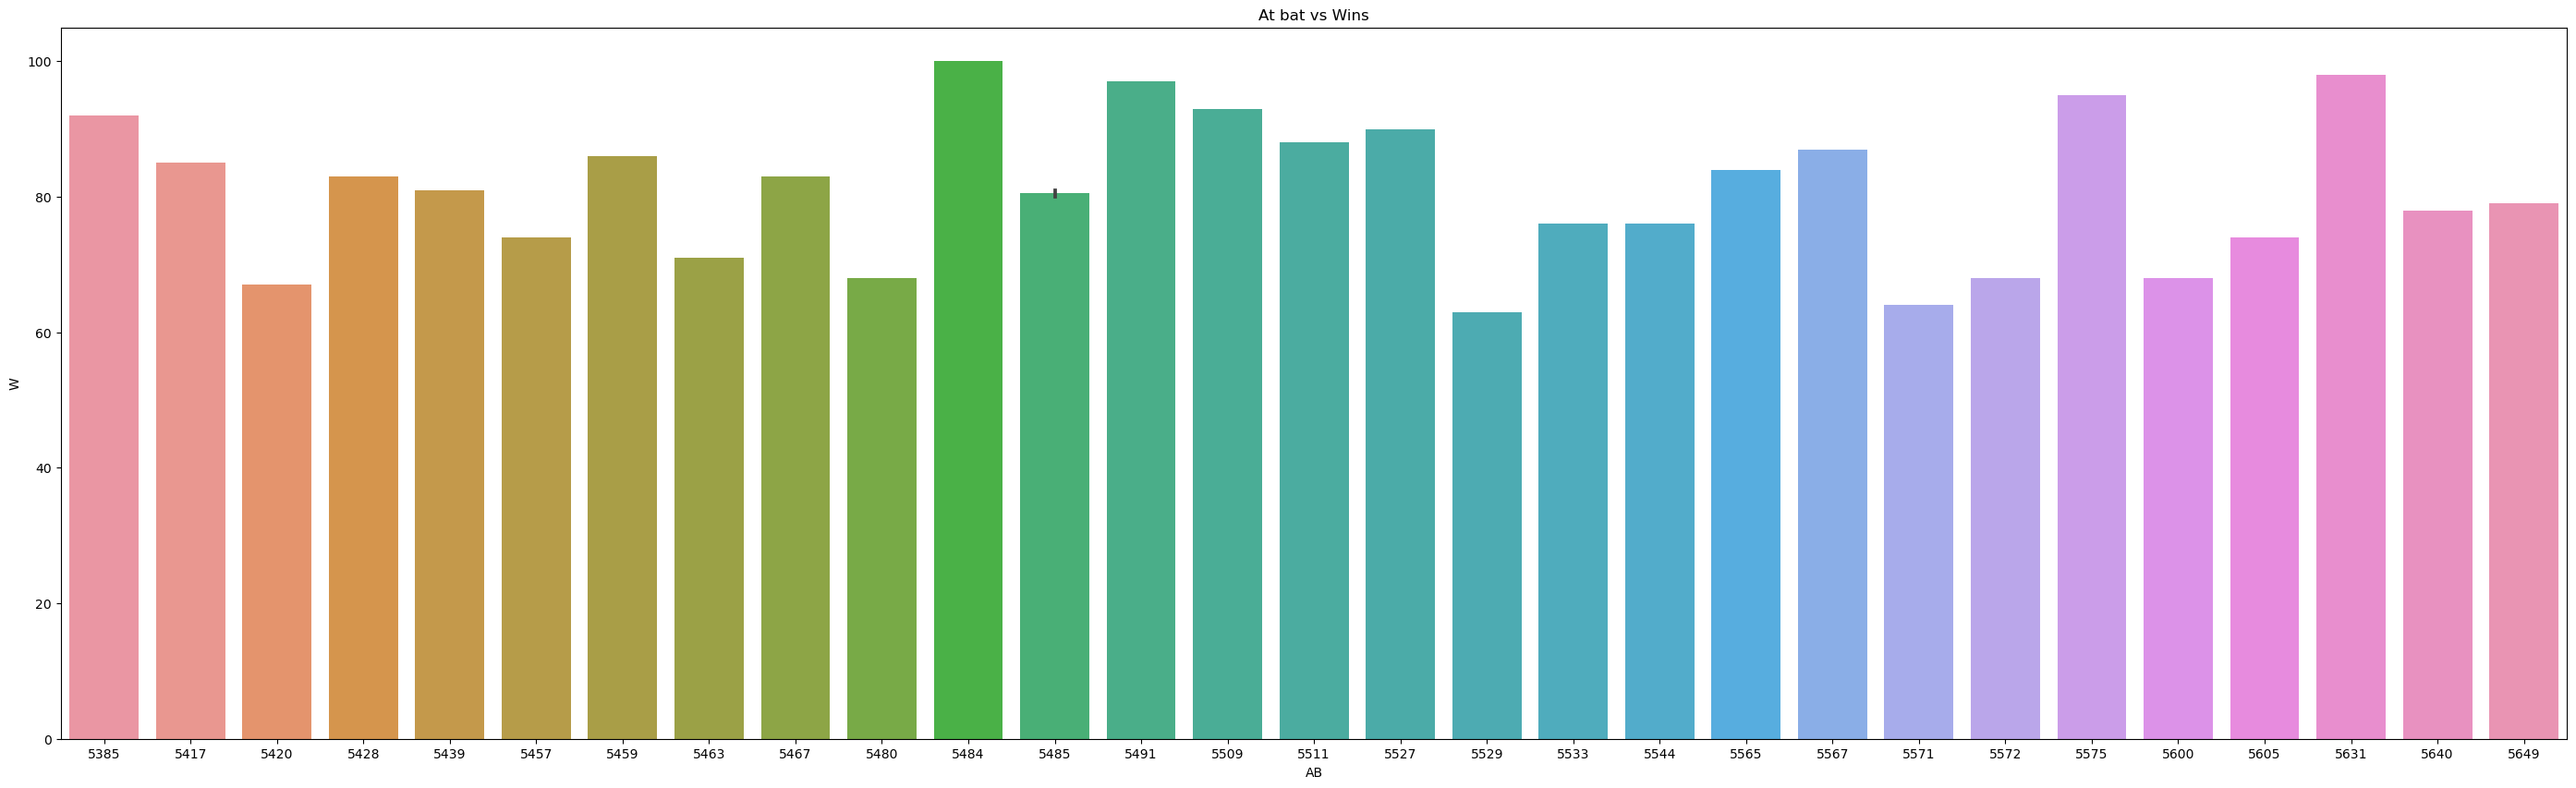

In [1117]:
# Barplot Display distribution of data across At bat vs Wins. 
plt.figure(figsize=(35,10))
plt.title('At bat vs Wins')
sns.barplot(x='AB',y='W',data=df)

By observing barplot, the Runs scored at bat has high percentage of wins for an team.

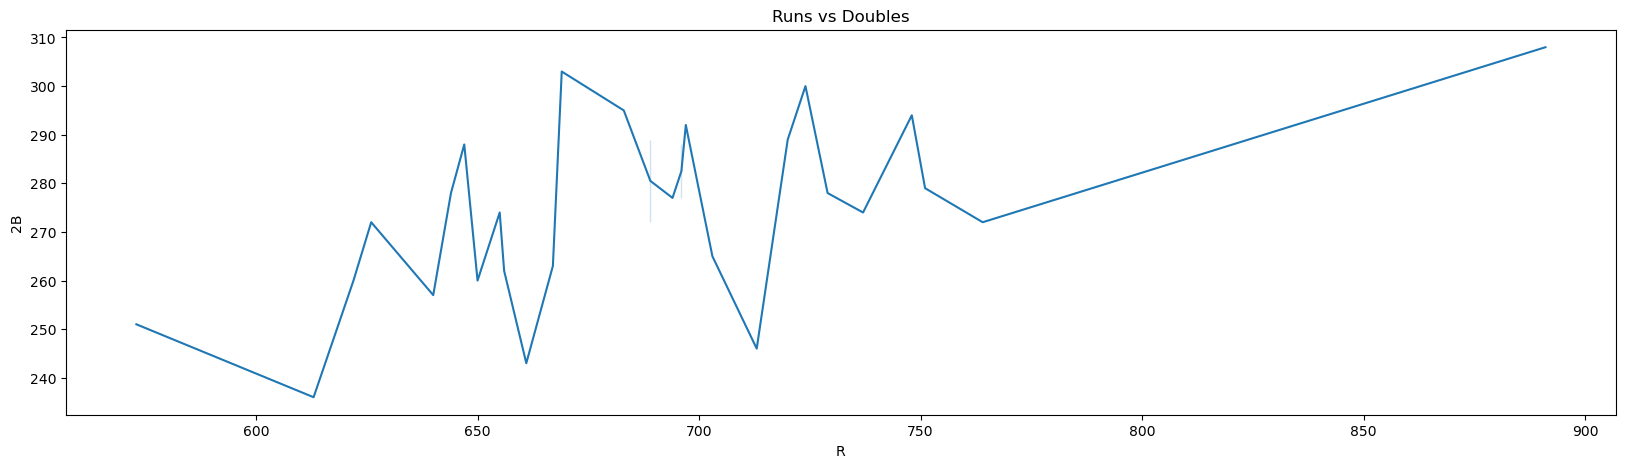

In [1118]:
#lineplot Display distribution of data across Runs vs Doubles.
plt.figure(figsize=(20,5))
plt.title('Runs vs Doubles')
sns.lineplot(x='R',y='2B',data=df)
plt.show()

By observing barplot, the runs scored at doubles has high percentage of wins for an team.

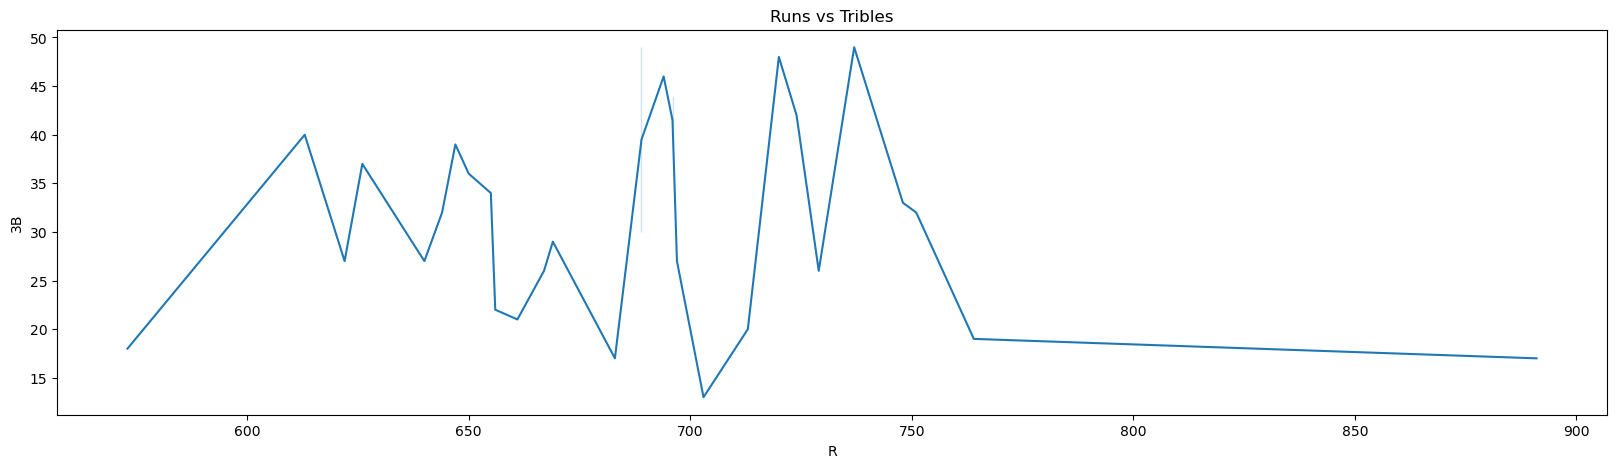

In [1119]:
#Lineplot Display distribution of data across Runs vs Triples 
plt.figure(figsize=(20,5))
plt.title('Runs vs Tribles')
sns.lineplot(x='R',y='3B',data=df)
plt.show()

by observing the lineplot, the triple runs scored by an team has maximum runs of 750.

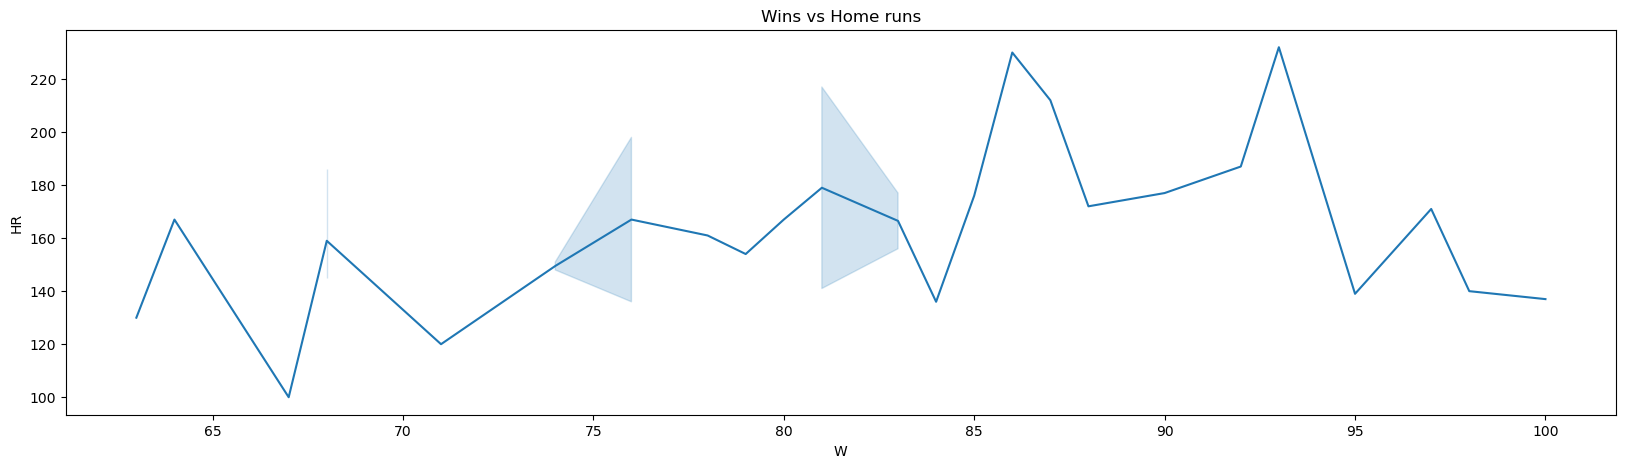

In [1120]:
# lineplot Display distribution of data across Wins vs Homeruns
plt.figure(figsize=(20,5))
plt.title('Wins vs Home runs')
sns.lineplot(x='W',y='HR',data=df)
plt.show()

By observing lineplot, the home runs scored by an team has maximum wins with 85 to 90 percentage.

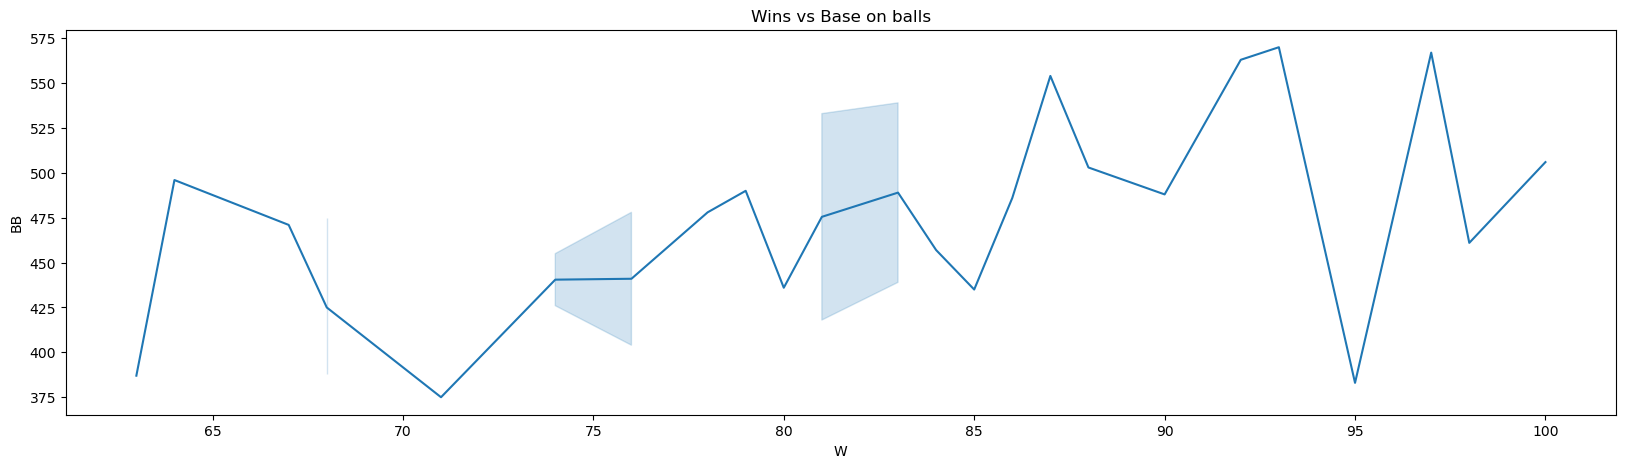

In [1121]:
# Lineplot Display distribution of data across Wins vs Base on balls
plt.figure(figsize=(20,5))
plt.title('Wins vs Base on balls')
sns.lineplot(x='W',y='BB',data=df)
plt.show()

By observing the distplot, the maximum base on ball runs has 87 to 93 percentage of wins.

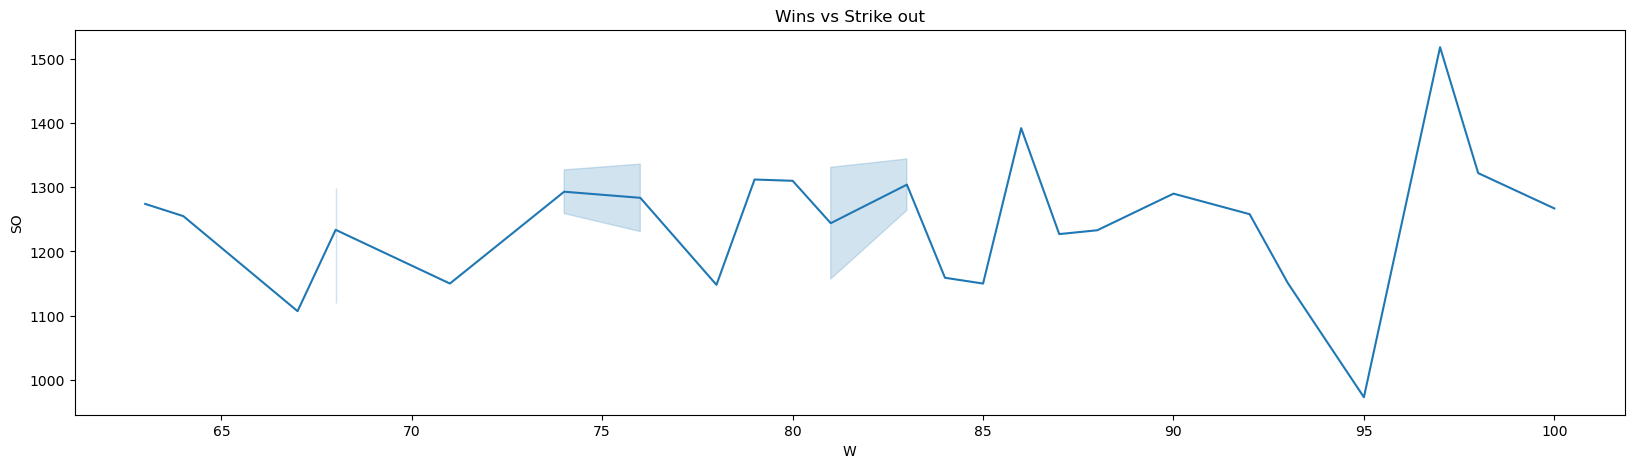

In [1122]:
# Lineplot Display distribution of data across Wins vs Strikeouts
plt.figure(figsize=(20,5))
plt.title('Wins vs Strike out')
sns.lineplot(x='W',y='SO',data=df)
plt.show()


By observing lineplot, the maximum strike out makes opposition team to wins maximum matches.

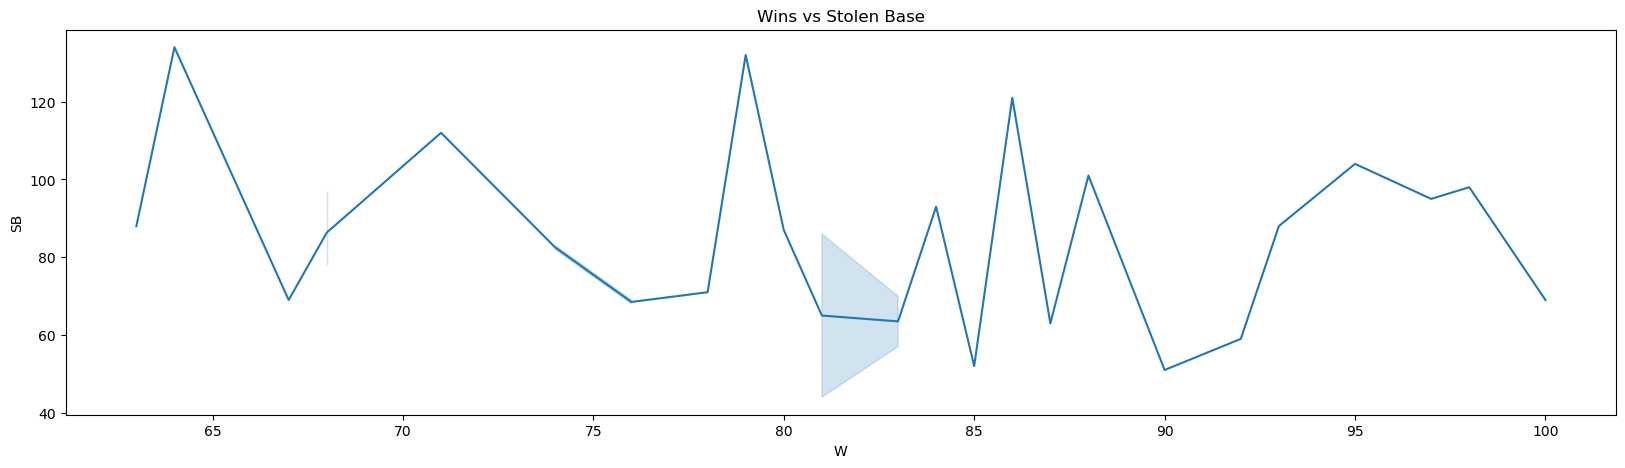

In [1123]:
# Lineplot Display distribution of data across Wins vs Stolen base
plt.figure(figsize=(20,5))
plt.title('Wins vs Stolen Base')
sns.lineplot(x='W',y='SB',data=df)
plt.show()

By observing lineplot, the maximum stolen base occurs at matches wins with 60 to 80 percentage.

<AxesSubplot: title={'center': 'Earned Runs vs Earned runs average'}, xlabel='ER', ylabel='ERA'>

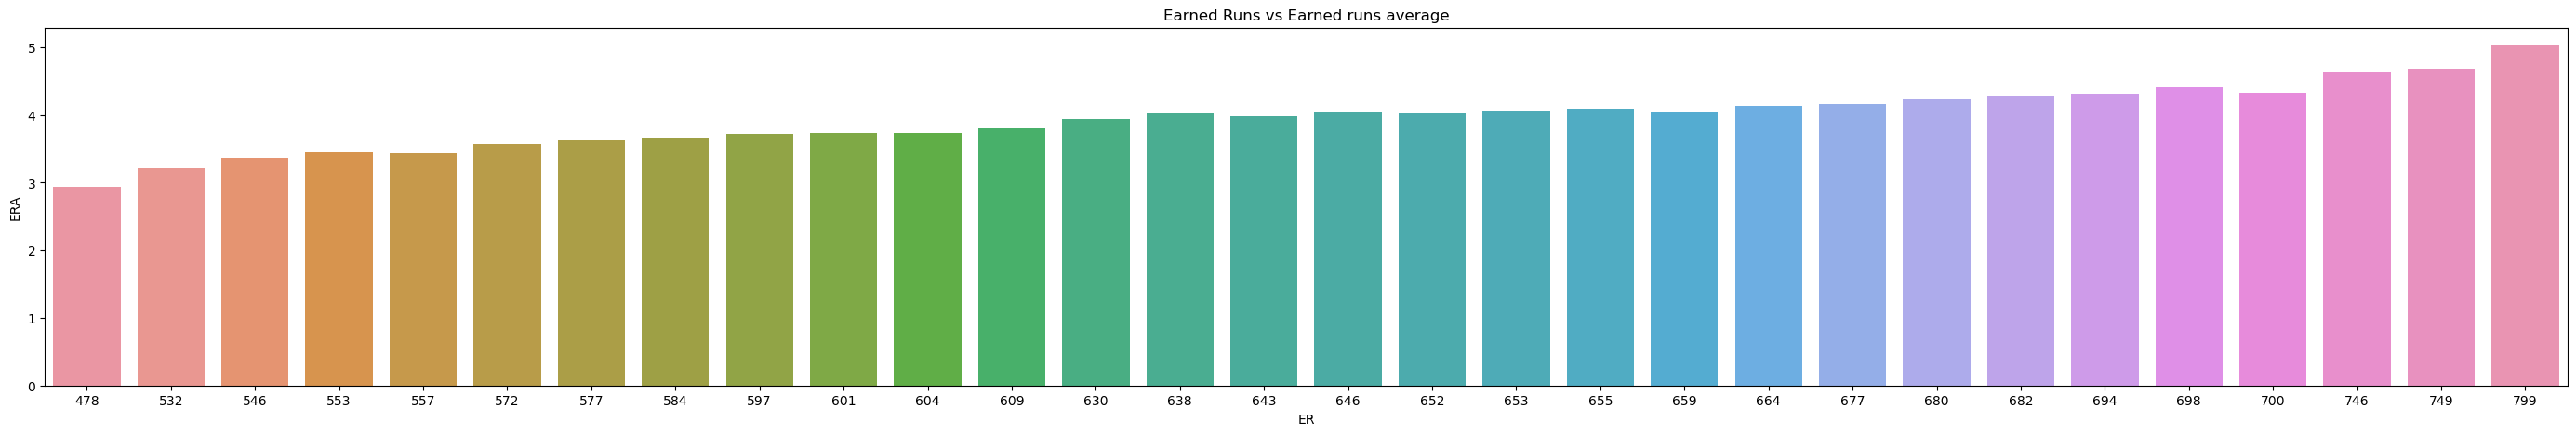

In [1124]:
# Barplot Display distribution of data across Earned runs vs Earned runs average.
plt.figure(figsize=(35,5))
plt.title('Earned Runs vs Earned runs average')
sns.barplot(x='ER',y='ERA',data=df)

By observing barplot, the earned runs increases gradually with average runs scored by an team.

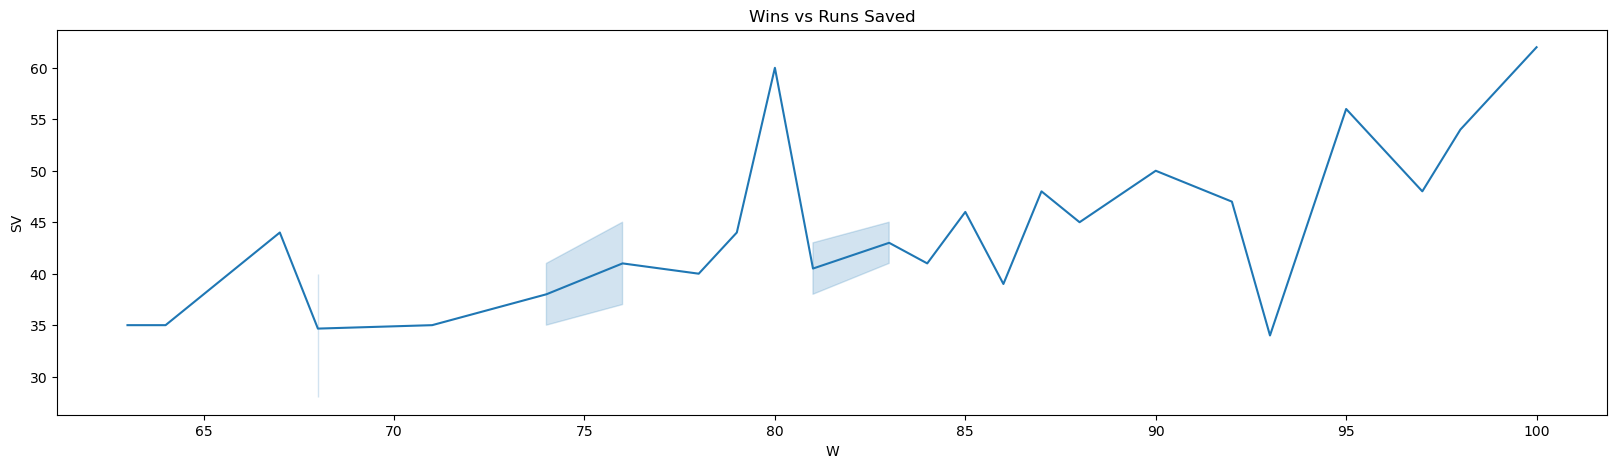

In [1125]:
# Lineplot Display distribution of data across wins vs runs saved.
plt.figure(figsize=(20,5))
plt.title('Wins vs Runs Saved')
sns.lineplot(x='W',y='SV',data=df)
plt.show()

By observing lineplot, the maimum runs saved by an team has high percentage of wins rate of 100%

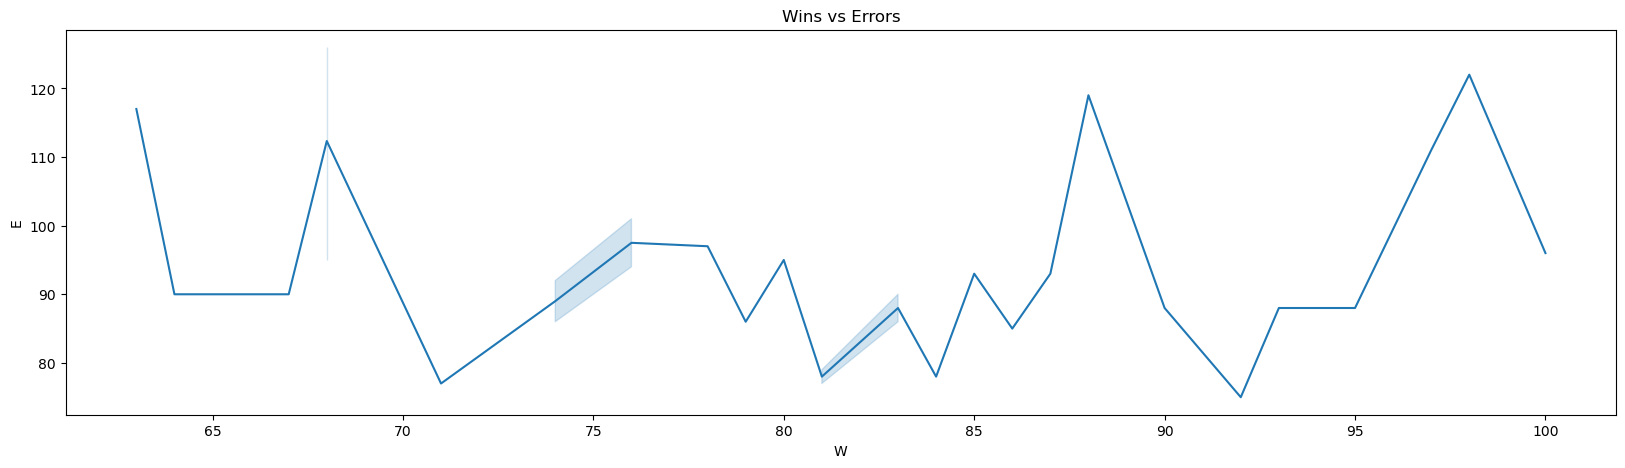

In [1126]:
# Lineplot Display distribution of data across Wins vs Errors.
plt.figure(figsize=(20,5))
plt.title('Wins vs Errors')
sns.lineplot(x='W',y='E',data=df)
plt.show()

By observing lineplot, the maximum error makes opposition team to wins maximum matches.

Graphical representation conclusion

The columns included in data has plays vital role for target variables.so we are not going to drop any of the columns.


In [1127]:
collist=df.columns.values
ncol=12
nrow=10

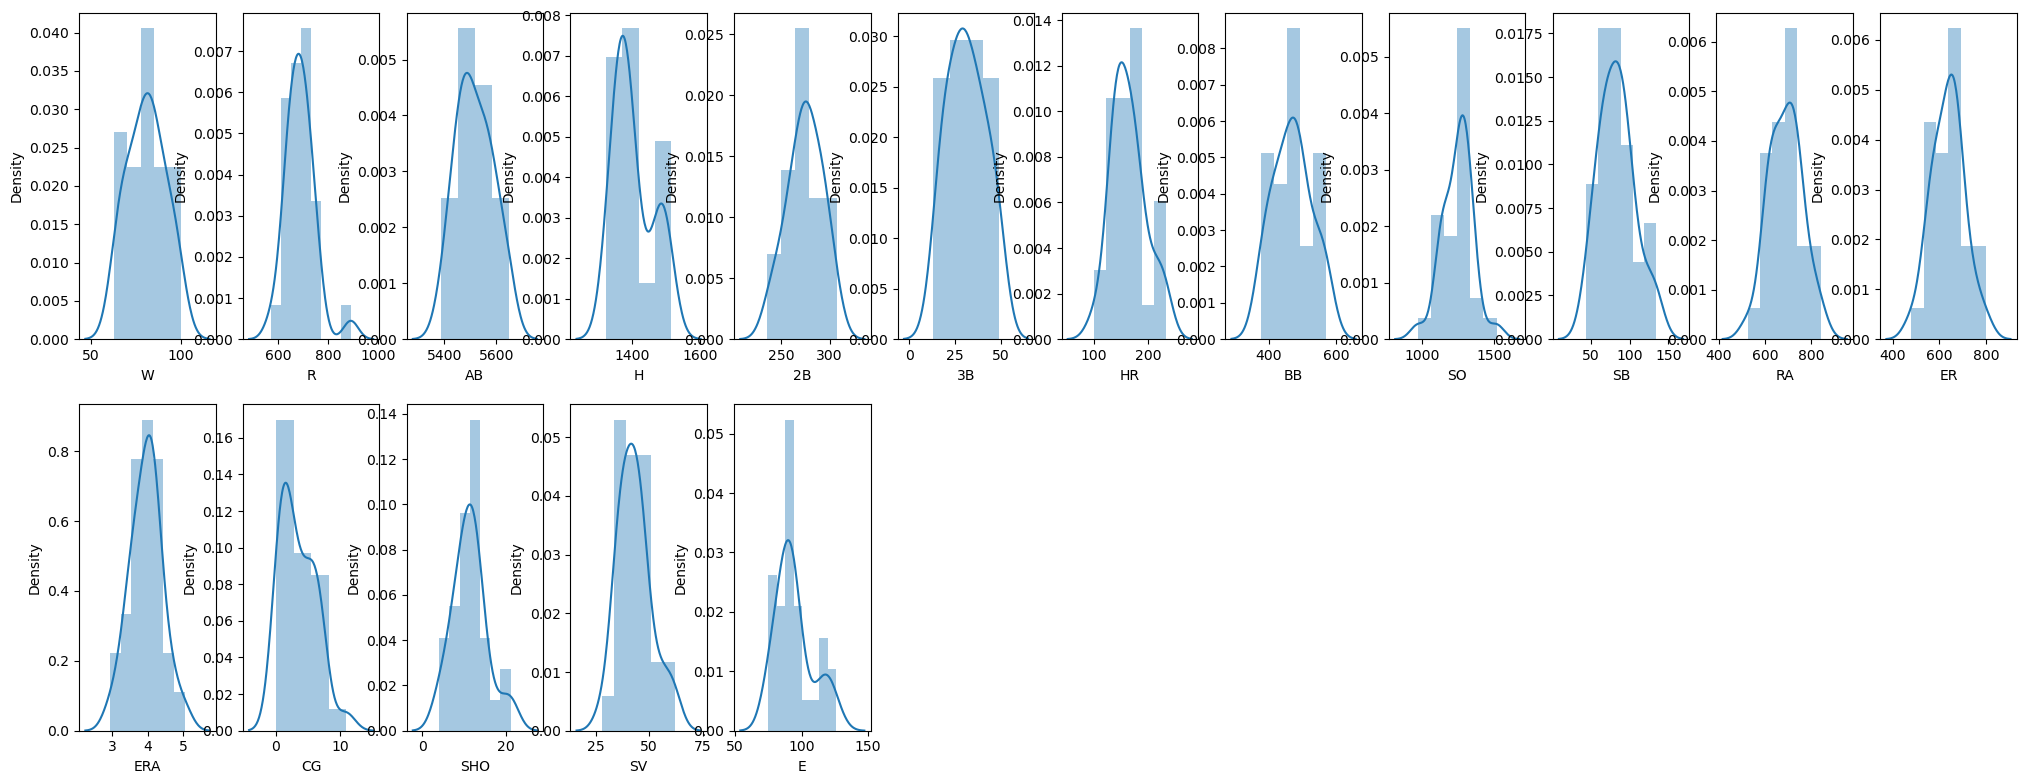

In [1128]:
#plt.figure(figsize=(5*totalcol,5*totalcol))
plt.figure(figsize=(25,50))
for i in range(0, len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

By observing distplot,the normal distribution is noticed in target variables but we can find the skewness in some features.so we should reduce it using power transfer function.

# Preprocessing

In [1129]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [1130]:
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [1131]:
# df=df.drop(['CG','SB'],axis=1)

In [1132]:
df.head() 

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


## Correlation

In [1133]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [1134]:
# df.corr()['E'].sort_values()

<AxesSubplot: >

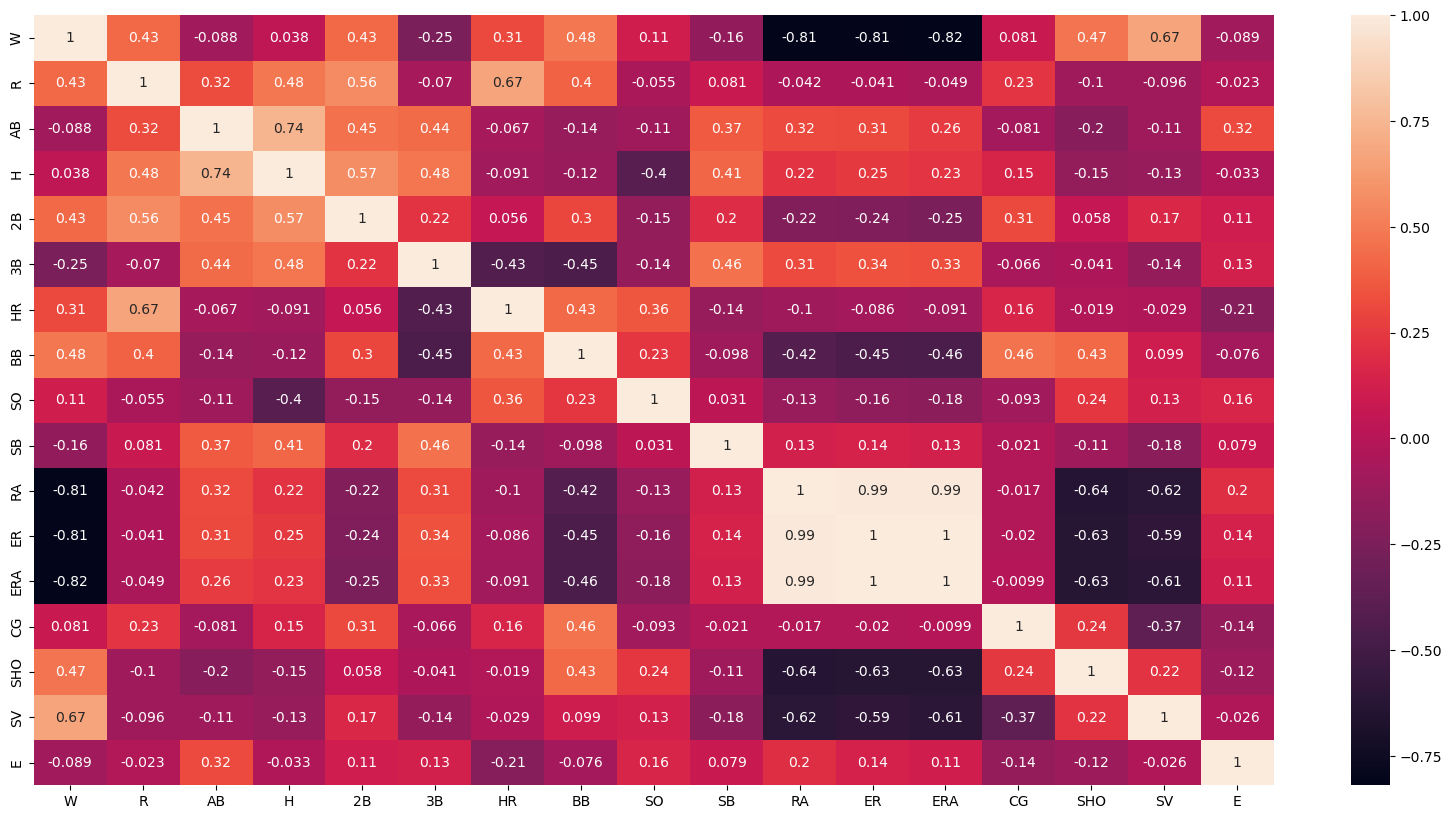

In [1135]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

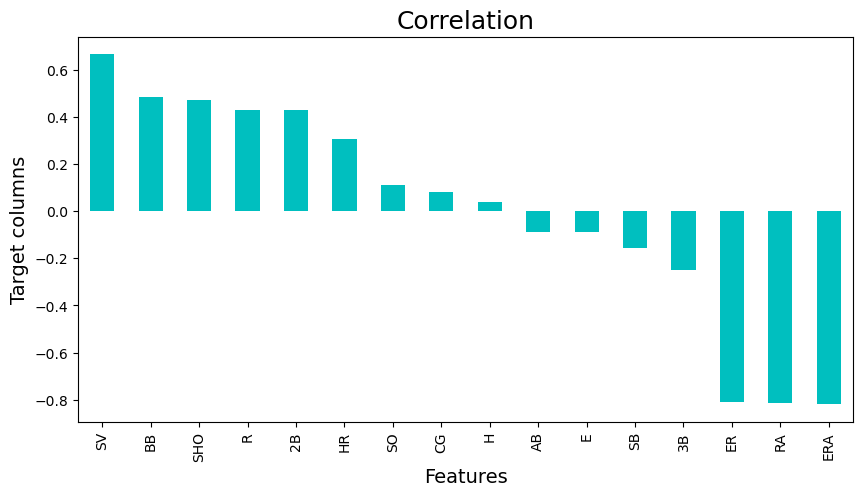

In [1136]:
# Display distribution of data across all level of category
plt.figure(figsize=(10,5))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target columns',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

By observing by Correlation plot we found 'ER','RA','ERA'.which is highly correlated.

In [1137]:
X=df.drop('W',axis=1)
X.shape

(30, 16)

In [1138]:
y=df['W']

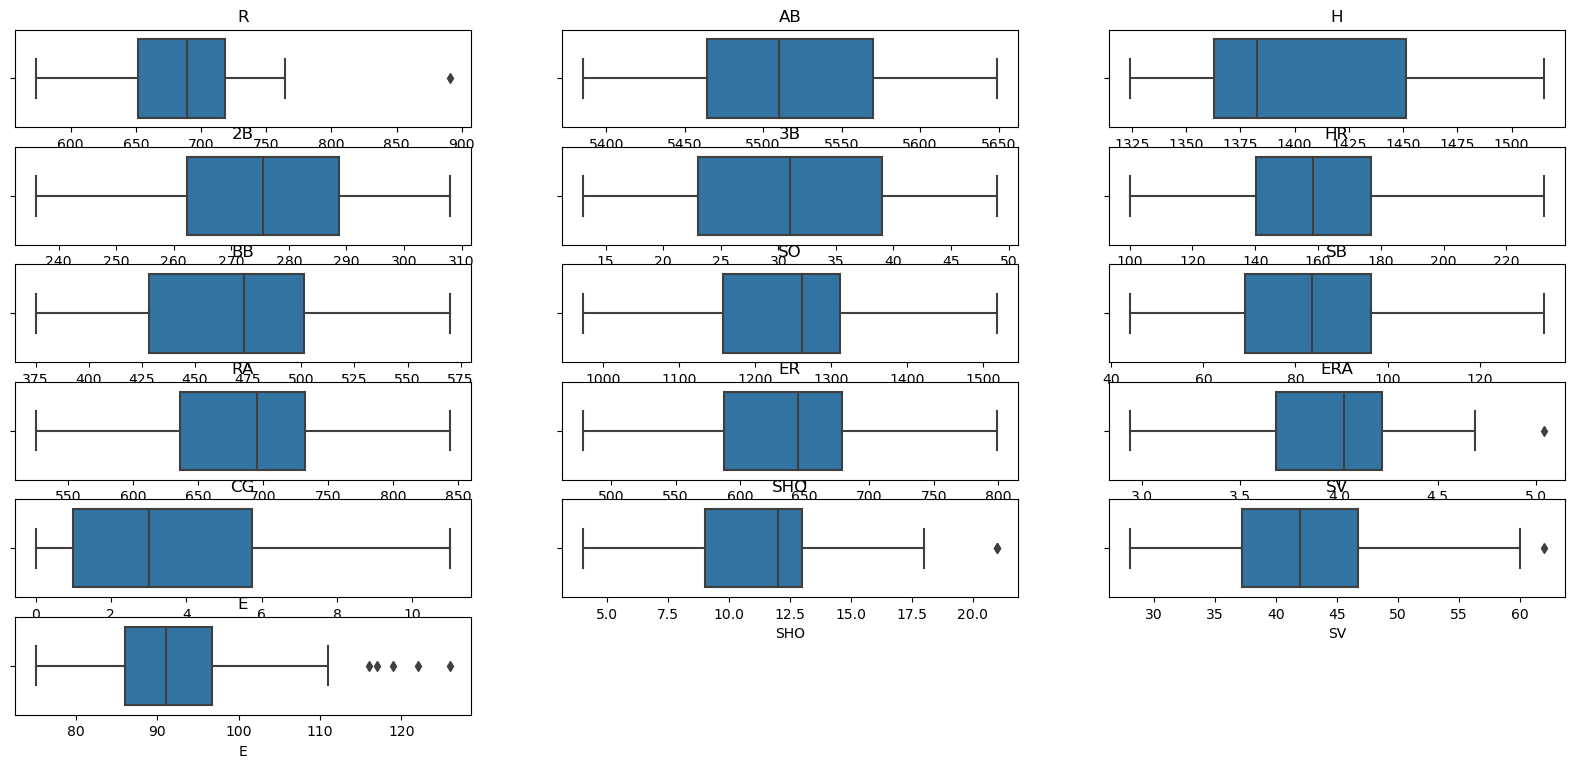

In [1139]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in X:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(x=i,data=X)
        plt.title(i)
        plt.xlabel(i)
    plotnumber+=1
plt.show()

In [1140]:
# detecting outliers
from scipy.stats import zscore
z=np.abs(zscore(X))

In [1141]:
z.shape

(30, 16)

In [1142]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [1143]:

df1=z[(z<3).all(axis=1)]
df1.shape

(29, 16)

In [1144]:
y=y[(z<3).all(axis=1)]
y.shape

(29,)

In [1145]:
X=df1.copy()

In [1146]:
# x=X.drop(['RA','ER','ERA'],axis=1)
# x.shape

In [1147]:
loss= (30-29)/30*100
print(loss)

3.3333333333333335


In [1148]:
x=X.drop(['ER','RA'],axis=1)
x.shape

(29, 14)

In [1149]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,ERA,CG,SHO,SV,E
0,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.641347,2.772641,0.320914,0.654856,1.117242
3,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.531318,1.300442,0.172800,1.042600,0.607197
6,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.484557,0.907856,0.172800,2.188598,0.048576
9,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.792164,0.171757,0.320914,0.396360,0.194303
10,1.086415,0.076017,0.275303,0.239818,0.068115,0.267405,0.604334,0.148997,0.780144,0.635374,0.564343,0.567771,0.249879,1.797303


In [1150]:
x.skew()

R      0.864938
AB     0.506372
H      0.429768
2B     0.599712
3B     0.292155
HR     1.076661
BB     0.366809
SO     1.635138
SB     0.795570
ERA    1.066288
CG     1.610792
SHO    1.224183
SV     1.222167
E      0.725746
dtype: float64

In [1151]:
from sklearn.preprocessing import power_transform
dfx=power_transform(x,method="yeo-johnson")

In [1152]:
pd.DataFrame(dfx,columns=x.columns).skew().sort_values(ascending=True)

3B    -0.018854
CG    -0.005359
AB     0.006294
H      0.008293
2B     0.019187
BB     0.022826
R      0.023119
SB     0.023907
HR     0.063431
ERA    0.066288
SO     0.081381
E      0.095188
SV     0.099456
SHO    0.209877
dtype: float64

In [1153]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif=pd.DataFrame()
Vif['Vif']=[variance_inflation_factor(dfx,i) for i in range(dfx.shape[1])]
Vif['features']=x.columns
Vif

,Vif,features
0,3.817296,R
1,1.574160,AB
2,1.979318,H
3,2.632557,2B
4,2.884421,3B
5,2.833980,HR
6,1.513357,BB
7,1.744711,SO
8,1.615583,SB
9,1.753242,ERA


Now the VIF values have reduced within 10, this means Multicolinearity has been solved, lets start building model. Finding Best Random State

In [1154]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled = scaler.fit_transform(dfx) 
x=x_scaled

In [1155]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=6)

In [1156]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
pred

array([71.64944785, 68.54414842, 95.75188813, 91.54841993, 75.57167085,
       97.56264329, 70.75195638, 59.92382437])

In [1157]:
pred_train=lr.predict(x_train)
pred_train

array([73.26565553, 71.44906127, 80.93182031, 81.86385865, 84.91386642,
       74.18794331, 77.21522224, 93.00248214, 63.50383478, 65.73947001,
       84.77587151, 81.93463045, 93.80027786, 93.7483036 , 93.05917907,
       68.47801754, 66.16950632, 82.45817732, 71.29028354, 85.70638719,
       88.50615095])

In [1158]:
lr.score(x_train,y_train)

0.9322367420314087

In [1159]:
print("Mean absolute error:",mean_absolute_error(y_test,pred))

print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

Mean absolute error: 18.802737933320977
Root mean squared error: 20.94262820162357


In [1160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [1161]:
ls=Lasso(alpha=.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: -142.4689546396515
Cross Val Score: -482.01172310325387


In [1162]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [1163]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:1.0
At random state 0,the testing accuracy is:-1.4204874019000409


At random state 1,the training accuracy is:1.0
At random state 1,the testing accuracy is:-0.6035353535353536


At random state 2,the training accuracy is:1.0
At random state 2,the testing accuracy is:-5.899906454630496


At random state 3,the training accuracy is:1.0
At random state 3,the testing accuracy is:-0.10907682557566378


At random state 4,the training accuracy is:1.0
At random state 4,the testing accuracy is:-2.7934322033898304


At random state 5,the training accuracy is:1.0
At random state 5,the testing accuracy is:-1.6762206298950173


At random state 6,the training accuracy is:1.0
At random state 6,the testing accuracy is:-0.9129851622097411


At random state 7,the training accuracy is:1.0
At random state 7,the testing accuracy is:-0.8438338421685632


At random state 8,the training accuracy is:1.0
At random state 8,the testing accuracy is:-0.245347394540943


At

In [1164]:
mnb= GaussianNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
y_pred

array([68, 68, 68, 68, 68, 68, 68, 68, 68, 68], dtype=int64)

In [1165]:
print(confusion_matrix(y_test,y_pred))

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]]


In [1166]:
print('R2 score is:', r2_score(y_test, pred_model))

R2 score is: -31.324465683237676


In [1167]:
Model.score(x_test,y_test)

-31.324465683237676

# Decision tree

In [1168]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_dt)*100)

Accuracy score -101.01122209890244


# Gradiant Boosting

In [1169]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr = gbr.predict(x_test)
print("Accuracy score", r2_score(y_test, pred_gbr)*100)

Accuracy score 12.646886642281284


In [1170]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor(criterion='mse',max_features='auto')
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: -11.371722777161143
Cross Val Score: -142.01732977747434


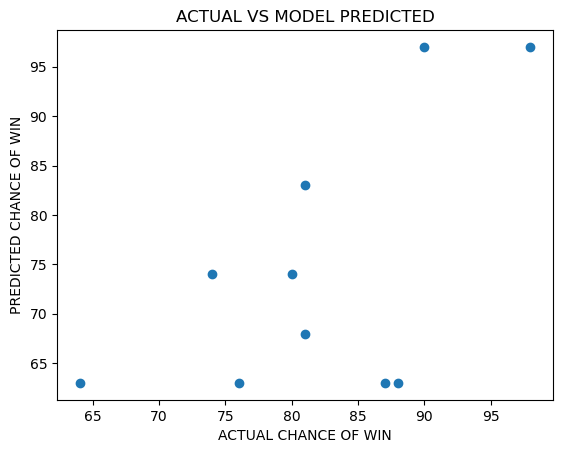

In [1180]:
plt.scatter(y_test,pred_dt)
plt.xlabel("ACTUAL CHANCE OF WIN")
plt.ylabel("PREDICTED CHANCE OF WIN")
plt.title("ACTUAL VS MODEL PREDICTED")
plt.show()

In [1172]:
import pickle
filename='Baseball case study.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [1176]:
loaded_model = pickle.load(open('Baseball case study.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(-result*100)

77.57079329591056


In [1175]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_dt[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9
Predicted,66.289963,82.74757,91.071179,73.551253,73.903635,73.472332,92.637372,91.514376,89.032863,79.862697
Original,63.000000,63.00000,97.000000,74.000000,63.000000,74.000000,63.000000,97.000000,83.000000,68.000000
